In [38]:
!pip install sklearn

     |████████████████████████████████| 26.7 MB 5.7 MB/s eta 0:00:01     |██████████████████▉             | 15.8 MB 5.7 MB/s eta 0:00:0202
     |████████████████████████████████| 306 kB 18.6 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=55c89fc67c5a817fd05d08d1a186c246e67495fa9fb82bdf8b02002a96a831c4
  Stored in directory: /home/franktu/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [32]:
!pip install seaborn

     |████████████████████████████████| 292 kB 1.0 MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('loans.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [2]:
import seaborn as sns

In [3]:
df.shape

(2260701, 151)

In [6]:
#選取需要的column, 原本有151個
df_ = df[['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length',
                        'home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose',
                        'title','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util',
                        'total_acc','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']]

In [9]:
df_.shape

(2260701, 26)

In [10]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 26 columns):
loan_amnt               float64
term                    object
int_rate                float64
installment             float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc              float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
title                   object
dti                     float64
earliest_cr_line        object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status     object
application_type        object
mort_acc                float64
pub_rec_bankruptcies    float64
dtypes: float64(12), object(14)
memory usage: 448.4+ MB


In [12]:
#loan_status存在下列值
df_['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [16]:
#留下F.P.和C.O.
df_ = df_[(df_['loan_status'] == 'Fully Paid') | (df_['loan_status'] == 'Charged Off')]

In [17]:
df_['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
df_.shape

(1345310, 26)

In [20]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 26 columns):
loan_amnt               1345310 non-null float64
term                    1345310 non-null object
int_rate                1345310 non-null float64
installment             1345310 non-null float64
grade                   1345310 non-null object
sub_grade               1345310 non-null object
emp_title               1259525 non-null object
emp_length              1266799 non-null object
home_ownership          1345310 non-null object
annual_inc              1345310 non-null float64
verification_status     1345310 non-null object
issue_d                 1345310 non-null object
loan_status             1345310 non-null object
purpose                 1345310 non-null object
title                   1328651 non-null object
dti                     1344936 non-null float64
earliest_cr_line        1345310 non-null object
open_acc                1345310 non-null float64
pub_rec          

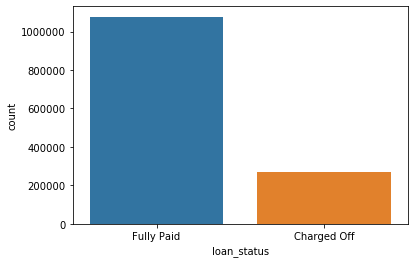

In [22]:
sns.countplot(x = 'loan_status',data=df_)

(0, 45000)

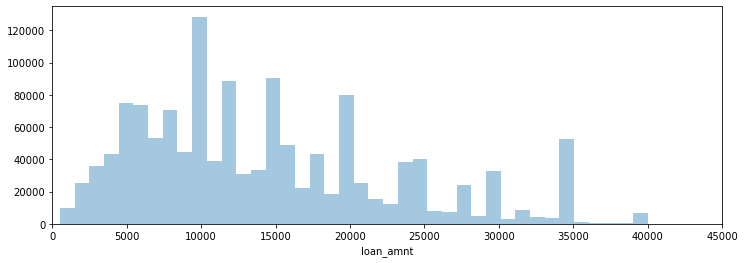

In [24]:
#貸款金額
plt.figure(figsize = (12,4))
sns.distplot(df_['loan_amnt'], kde = False, bins=40)
plt.xlim(0,45000)

In [27]:
#變數的相關性
corr = df_.corr()

(10, 0)

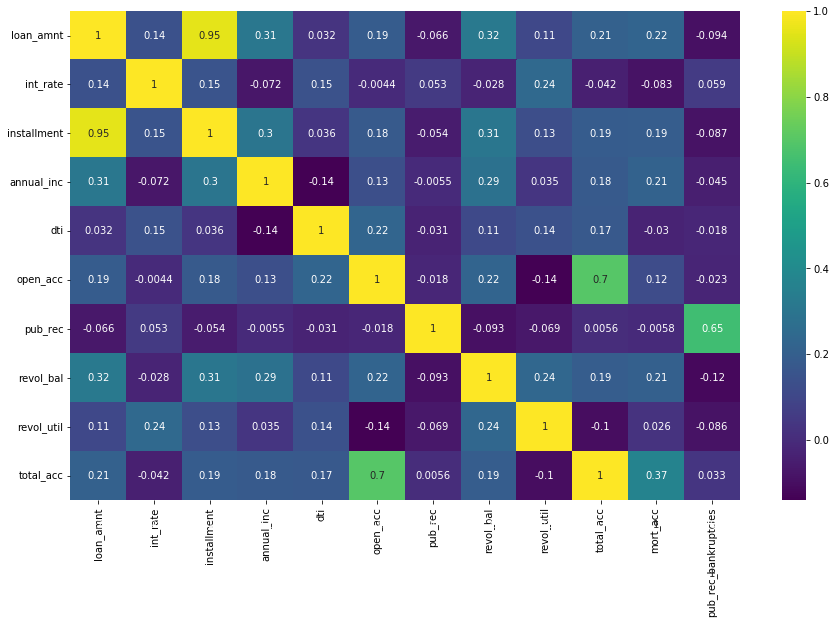

In [28]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot = True, cmap='viridis')
plt.ylim(10, 0)

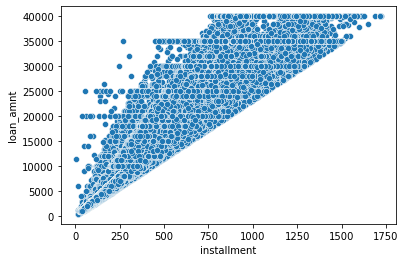

In [29]:
#通常每月欠款愈大, 貸款金額愈大, 兩者關聯性高
sns.scatterplot(x='installment', y='loan_amnt', data=df_)

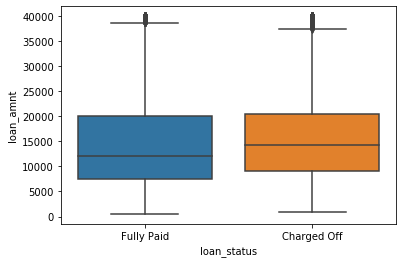

In [30]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df_)

In [31]:
df_.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,268559.0,15565.055444,8814.560077,900.0,9000.0,14350.0,20400.0,40000.0
Fully Paid,1076751.0,14134.369808,8669.028973,500.0,7500.0,12000.0,20000.0,40000.0


In [32]:
#信用評等從A到G
sorted(df_['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [34]:
sorted(df_['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

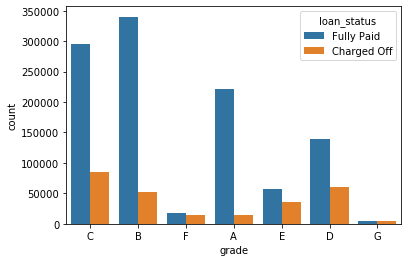

In [38]:
#每個評等的償還數量
sns.countplot(x='grade',data=df_,hue='loan_status')

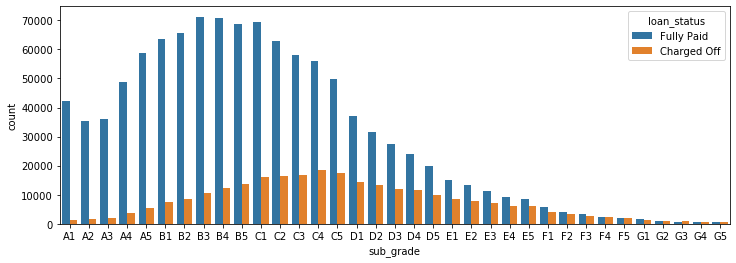

In [39]:
#每個subgrade的償還數量
plt.figure(figsize=(12,4))
subgrade_order = sorted(df_['sub_grade'].unique())
sns.countplot(x='sub_grade',data = df_,order = subgrade_order ,hue='loan_status')

In [42]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_['loan_repaid'] = label_encoder.fit_transform(df_['loan_status'])
#df_['loan_repaid']

In [47]:
#other columns與loan_paid的相關性
df_.corr()['loan_repaid'].sort_values().drop('loan_repaid')

int_rate               -0.258792
dti                    -0.084510
loan_amnt              -0.065604
revol_util             -0.060048
installment            -0.051701
open_acc               -0.028078
pub_rec                -0.026194
pub_rec_bankruptcies   -0.025308
total_acc               0.011300
revol_bal               0.020010
annual_inc              0.041759
mort_acc                0.075294
Name: loan_repaid, dtype: float64

In [54]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 26 columns):
loan_amnt               1345310 non-null float64
term                    1345310 non-null object
int_rate                1345310 non-null float64
installment             1345310 non-null float64
grade                   1345310 non-null object
sub_grade               1345310 non-null object
emp_title               1259525 non-null object
emp_length              1266799 non-null object
home_ownership          1345310 non-null object
annual_inc              1345310 non-null float64
verification_status     1345310 non-null object
issue_d                 1345310 non-null object
purpose                 1345310 non-null object
title                   1328651 non-null object
dti                     1344936 non-null float64
earliest_cr_line        1345310 non-null object
open_acc                1345310 non-null float64
pub_rec                 1345310 non-null float64
revol_bal       

In [59]:
#missing data
#df_的data數
length = len(df_)

In [61]:
lost = df_.isnull().sum()
print(lost * 100 / length)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.376597
emp_length              5.835904
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.238302
dti                     0.027800
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.063703
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                3.514506
pub_rec_bankruptcies    0.051810
loan_repaid             0.000000
dtype: float64


In [65]:
#共有378352種數值
df_['emp_title'].nunique()

378353

In [66]:
df_= df_.drop('emp_title',axis=1)

In [67]:
#排序就業時間 移除缺失值
sorted(df_['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [68]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

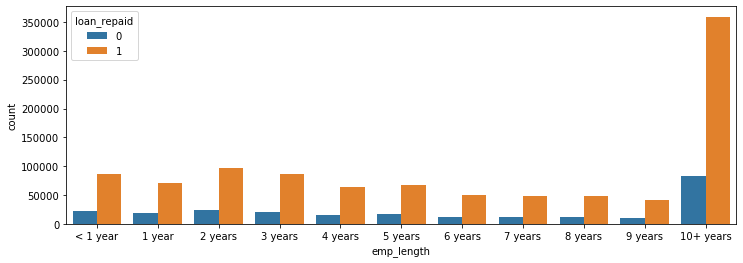

In [70]:
#依工作年份分類的償還數量
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df_,order=emp_length_order,hue='loan_repaid')

In [71]:
#償還比率各年份差距不大, 因此剔除
df_ = df_.drop('emp_length',axis=1)

In [72]:
df_['purpose'].unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [75]:
df_['title'].unique()

array(['Debt consolidation', 'Business', nan, ..., 'takeitaway',
       'Creditt Card Loan', 'debt reduction/hone updates'], dtype=object)

In [76]:
df_['title'].head(20)

0          Debt consolidation
1                    Business
2                         NaN
4              Major purchase
5          Debt consolidation
6          Debt consolidation
7              Major purchase
8     Credit card refinancing
9     Credit card refinancing
12                        NaN
13         Debt consolidation
14         Debt consolidation
15    Credit card refinancing
16         Debt consolidation
17         Debt consolidation
19         Debt consolidation
20         Debt consolidation
21    Credit card refinancing
22         Debt consolidation
23    Credit card refinancing
Name: title, dtype: object

In [77]:
df_['title'].head(20)

0          Debt consolidation
1                    Business
2                         NaN
4              Major purchase
5          Debt consolidation
6          Debt consolidation
7              Major purchase
8     Credit card refinancing
9     Credit card refinancing
12                        NaN
13         Debt consolidation
14         Debt consolidation
15    Credit card refinancing
16         Debt consolidation
17         Debt consolidation
19         Debt consolidation
20         Debt consolidation
21    Credit card refinancing
22         Debt consolidation
23    Credit card refinancing
Name: title, dtype: object

In [78]:
df_ = df_.drop('title',axis=1)

In [79]:
df_.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
dti                       374
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                857
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                47281
pub_rec_bankruptcies      697
loan_repaid                 0
dtype: int64

In [83]:
#將剩下遺漏值以中位數填補
median = np.nanmedian(df_['mort_acc'])
df_['mort_acc'] = np.where(df_['mort_acc'].isnull(), median, df_['mort_acc'])
df_['mort_acc'].value_counts()

0.0     523837
1.0     273416
2.0     188941
3.0     139381
4.0      94920
5.0      57632
6.0      32539
7.0      16850
8.0       8378
9.0       4285
10.0      2197
11.0      1206
12.0       640
13.0       356
14.0       244
15.0       132
16.0        93
17.0        61
18.0        48
19.0        29
20.0        25
24.0        16
21.0        14
22.0        14
23.0        10
25.0         9
27.0         8
26.0         6
28.0         4
29.0         4
34.0         3
30.0         2
32.0         2
37.0         2
31.0         2
51.0         1
47.0         1
36.0         1
35.0         1
Name: mort_acc, dtype: int64

In [87]:
np.nanmedian(df_['dti'])
df_['dti'] = np.where(df_['dti'].isnull(), median, df_['dti'])

In [93]:
np.nanmedian(df_['pub_rec_bankruptcies'])
df_['pub_rec_bankruptcies'] = np.where(df_['pub_rec_bankruptcies'].isnull(), median, df_['pub_rec_bankruptcies'])
#df_['mort_acc'].value_counts()

In [96]:
np.nanmedian(df_['revol_util'])
df_['revol_util'] = np.where(df_['revol_util'].isnull(), median, df_['revol_util'])

In [97]:
df_.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_repaid             0
dtype: int64

In [99]:
#處理非量化column
df_.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_repaid
0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0,1
1,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0,1
2,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0,1
4,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0,1
5,11950.0,36 months,13.44,405.18,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0,1


In [102]:
df_['term'] = label_encoder.fit_transform(df_['term'])
#df_['term']

In [103]:
df_ = df_.drop('grade', axis = 1)

In [109]:
df_['sub_grade'] = label_encoder.fit_transform(df_['sub_grade'])
#df_['sub_grade'].nunique()

In [113]:
df_.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')

In [116]:
df_['issue_d'].nunique()

139

In [117]:
#發行日關聯性低
df_ = df_.drop(['issue_d'],axis=1)

In [121]:
df_['home_ownership'] = label_encoder.fit_transform(df_['home_ownership'])
df_['verification_status'] = label_encoder.fit_transform(df_['verification_status'])
df_['application_type'] = label_encoder.fit_transform(df_['application_type'])
df_['initial_list_status'] = label_encoder.fit_transform(df_['initial_list_status'])
df_['purpose'] = label_encoder.fit_transform(df_['purpose'])

In [125]:
pd.set_option('display.max_columns', None)
df_.head(5)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_repaid
0,3600.0,0,13.99,123.03,13,1,55000.0,0,2,5.91,Aug-2003,7.0,0.0,2765.0,29.7,13.0,1,0,1.0,0.0,1
1,24700.0,0,11.99,820.28,10,1,65000.0,0,11,16.06,Dec-1999,22.0,0.0,21470.0,19.2,38.0,1,0,4.0,0.0,1
2,20000.0,1,10.78,432.66,8,1,63000.0,0,4,10.78,Aug-2000,6.0,0.0,7869.0,56.2,18.0,1,1,5.0,0.0,1
4,10400.0,1,22.45,289.91,25,1,104433.0,1,6,25.37,Jun-1998,12.0,0.0,21929.0,64.5,35.0,1,0,6.0,0.0,1
5,11950.0,0,13.44,405.18,12,5,34000.0,1,2,10.20,Oct-1987,5.0,0.0,8822.0,68.4,6.0,1,0,0.0,0.0,1


In [126]:
df_.select_dtypes(['object']).count()

earliest_cr_line    1345310
dtype: int64

In [127]:
df_['earliest_cr_line'].nunique()

739

In [128]:
df_ = df_.drop(['earliest_cr_line'],axis=1)

In [129]:
df_.select_dtypes(['object']).count()

Series([], dtype: int64)

In [132]:
from sklearn.model_selection import train_test_split
x = df_.drop(['loan_repaid'],axis=1)
y = df_['loan_repaid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.34,random_state=42)

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 6)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=6)

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
predict = model.predict(x_test)
#print(predict)
accuracy = accuracy_score(predict, y_test)
print("accuracy:", accuracy)
score = classification_report(y_test, predict)
print(score)

accuracy: 0.80150457143107
              precision    recall  f1-score   support

           0       0.64      0.01      0.01     91019
           1       0.80      1.00      0.89    366387

    accuracy                           0.80    457406
   macro avg       0.72      0.50      0.45    457406
weighted avg       0.77      0.80      0.71    457406

